# Feature Dimension Reduction Using PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('instacart.csv')
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,reorder_interval,n_orders,total_items,average_basket,days_reorder_ratio,orders,reorders,reorder_rate
0,1,0.0,1.0,0.0,4,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.000000
1,1,1.0,1.0,0.0,4,0.0,0.0,0.0,1.0,0.0,19.000000,10.0,11.0,1.100000,0.473684,76.0,49.0,0.644737
2,1,2.0,0.0,0.0,4,0.0,0.0,0.0,2.0,1.0,16.285714,14.0,31.0,2.214286,0.552632,4.0,1.0,0.250000
3,1,3.0,0.0,0.0,4,0.0,0.0,0.0,2.0,1.0,12.000000,12.0,0.0,0.000000,0.750000,6.0,6.0,1.000000
4,1,4.0,1.0,0.0,4,0.0,0.0,0.0,3.0,2.0,17.000000,5.0,0.0,0.000000,0.529412,22.0,14.0,0.636364


In [3]:
df.shape

(1384617, 18)

In [4]:
new_df = df.sample(n = len(df)//5)
new_df.shape

(276923, 18)

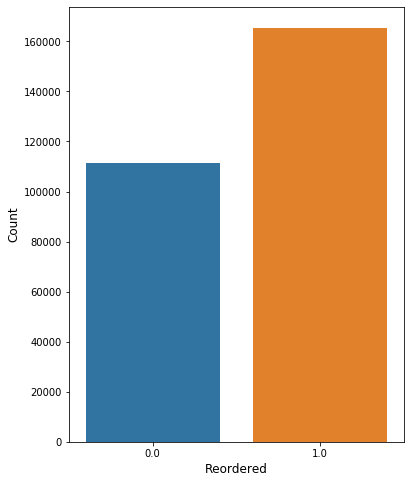

In [5]:
reordered_count = new_df['reordered'].value_counts()

plt.figure(figsize=(6,8))
sns.barplot(reordered_count.index, reordered_count.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Reordered', fontsize=12)
plt.show()

In [6]:
X = new_df.drop(['reordered'], axis=1)
y = new_df['reordered']
(X.shape, y.shape)

((276923, 17), (276923,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=42, stratify=y)
(X_train.shape, X_test.shape)

((193846, 17), (83077, 17))

In [9]:
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [10]:
# Remove constant, Quasi constant, and duplicate feature
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)

X_train_filter = X_train.loc[:, constant_filter.get_support()]
X_test_filter = X_test.loc[:, constant_filter.get_support()]

X_train_filter.shape, X_test_filter.shape

((193846, 16), (83077, 16))

In [11]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape, X_test_T.shape

X_train_T.duplicated().sum()

duplicated_features = X_train_T.duplicated()

features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

X_train_unique.shape, X_test_unique.shape

((193846, 16), (83077, 16))

In [12]:
X_train_unique.shape

(193846, 16)

In [13]:
# Removal of correlated features
corrmat = X_train_unique.corr()
corrmat.shape

(16, 16)

In [14]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                col_name = corrmat.columns[i]
                corr_col.add(col_name)
    return corr_col

corr_features = get_correlation(X_train_unique, 0.70)
print('Correlated Features:- ', len(set(corr_features)))

Correlated Features:-  4


In [15]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

X_train_uncorr.shape, X_test_uncorr.shape

((193846, 12), (83077, 12))

In [16]:
from sklearn.decomposition import PCA

In [17]:
def execute_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=101, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))

In [18]:
for component in range(1,len(X_train_uncorr.columns)):
    pca = PCA(n_components=component, random_state=101).fit(X_train_uncorr)
    X_train_pca = pca.transform(X_train_uncorr)
    X_test_pca = pca.transform(X_test_uncorr)
    print('Selected Compunent: ', component)
    execute_randomForest(X_train_pca, X_test_pca, y_train, y_test)
    print()

Selected Compunent:  1
Accuracy score:  0.6081225850716805

Selected Compunent:  2
Accuracy score:  0.5578198538705057

Selected Compunent:  3
Accuracy score:  0.5992151859118648

Selected Compunent:  4
Accuracy score:  0.6088207325733958

Selected Compunent:  5
Accuracy score:  0.6298133057284206

Selected Compunent:  6
Accuracy score:  0.6341345980235203

Selected Compunent:  7
Accuracy score:  0.6356994113894339

Selected Compunent:  8
Accuracy score:  0.6375170022990719

Selected Compunent:  9
Accuracy score:  0.6408271844192737

Selected Compunent:  10
Accuracy score:  0.6404179255389578

Selected Compunent:  11
Accuracy score:  0.6409114436005152



In [19]:
model = PCA(n_components=11).fit(X_train_uncorr)
X_pc = model.transform(X_train_uncorr)

n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X_train_uncorr.columns

# Get the most important feature names
most_important_feature_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_feature_names)

['order_id', 'product_id', 'aisle_id', 'orders', 'order_number', 'days_reorder_ratio', 'days_since_prior_order', 'n_orders', 'order_hour_of_day', 'reorder_interval', 'total_items']


In [23]:
df_pca = df[most_important_names + ['reordered']]
df_pca.to_csv(r'instacart_pca.csv', index=False)